# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Group data by each mouse in the study & count data points
mice = df.groupby('Mouse ID')
count = mice.count()

# Get list of number of timepoints & see if any mice have more than the total # of timepoints they should have
timepoints = len(df['Timepoint'].unique())
duplicate = count.loc[count['Timepoint'] > timepoints, ['Timepoint']]

# merge duplicate mouse(mice) with original dataframe to get more info
dup_mouse = pd.merge(duplicate, df, on='Mouse ID')
dup_mouse['Mouse ID'].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse

,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,13,0,45.000000,0,Propriva,Female,21,26
1,g989,13,0,45.000000,0,Propriva,Female,21,26
2,g989,13,5,48.786801,0,Propriva,Female,21,26
3,g989,13,5,47.570392,0,Propriva,Female,21,26
4,g989,13,10,51.745156,0,Propriva,Female,21,26
5,g989,13,10,49.880528,0,Propriva,Female,21,26
6,g989,13,15,51.325852,1,Propriva,Female,21,26
7,g989,13,15,53.442020,0,Propriva,Female,21,26
8,g989,13,20,55.326122,1,Propriva,Female,21,26
9,g989,13,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = df[df['Mouse ID'] != 'g989']
data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(data['Mouse ID'].unique())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group data by drug regimen
group = data.groupby('Drug Regimen')

# Collect series for each calcuation requested
mean = group['Tumor Volume (mm3)'].mean()
medn = group['Tumor Volume (mm3)'].median()
var = group['Tumor Volume (mm3)'].var()
std = group['Tumor Volume (mm3)'].std()
stder = group['Tumor Volume (mm3)'].sem()

# Create new dataframe to combine these values
new_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": medn,
    "Tumor Volume Variance": var,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": stder
})

# Display new dataframe
new_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
group.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

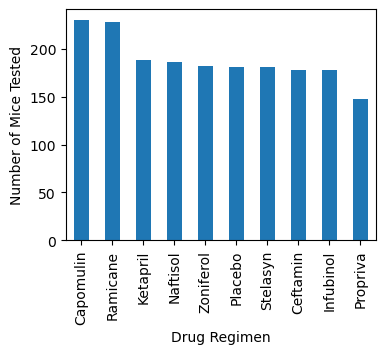

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Get counts of above data by drug regimen for all mice/timepoints tested & sort
drug_count = group.count()
drug_count = drug_count[['Mouse ID']]
sortd = drug_count.sort_values(['Mouse ID'], ascending=False)

# Plot bar chart using Pandas method
sortd.plot(kind='bar', figsize=(4, 3), legend=False)

# Add labels to graph
plt.ylabel('Number of Mice Tested')
plt.show()


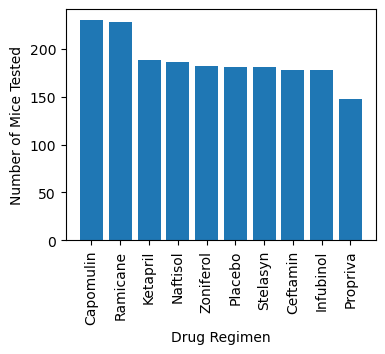

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Plot bar chart from above data using matplotlib method
plt.figure(figsize=(4, 3))
plt.bar(sortd.index, sortd['Mouse ID'])

# Label graph
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation='vertical')
plt.show()


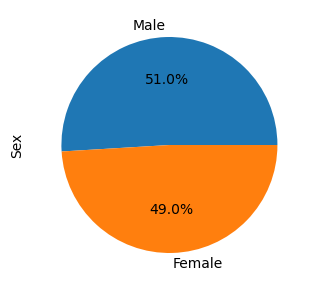

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group data by mouse sex & get counts
mouse_sex = data.groupby(['Sex'])
mf = mouse_sex['Sex'].count()
mf_pie = mf.sort_values(ascending=False)

# Plot pie chart using Pandas method
mf_pie.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 3))
plt.tight_layout()


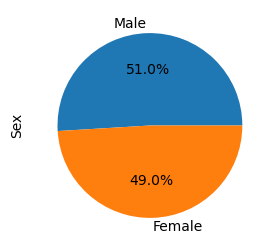

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Graph pie chart from above data using matplotlib method
plt.figure(figsize=(4, 3))
plt.pie(mf_pie, labels=mf_pie.index, autopct="%1.1f%%")

# Label graph
plt.ylabel(mf_pie.index.name)
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice2 = data.groupby('Mouse ID')
last = mice2['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(last, data, on=['Mouse ID', 'Timepoint'])
lst = last_df.sort_values(['Drug Regimen']).reset_index()
lst.head()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,66,g316,45,40.159220,2,Capomulin,Female,22,22
1,180,s710,45,40.728578,1,Capomulin,Female,1,23
2,183,t565,45,34.455298,0,Capomulin,Female,20,17
3,169,r944,45,41.581521,2,Capomulin,Male,12,25
4,163,r554,45,32.377357,3,Capomulin,Female,8,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Iterate through each drug regimen
for t in range(len(treatments)): 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    t_data = lst.loc[lst['Drug Regimen'] == treatments[t], ['Tumor Volume (mm3)']]
    
    # add subset 
    tumors = pd.Series(t_data['Tumor Volume (mm3)'])
    tumor_data.append(tumors)
    
    # Determine outliers using upper and lower bounds
    # Calculate IQR to find outliers
    quartiles = tumor_data[t].quantile([.25, .5, .75])
    lowrq = quartiles[.25]
    upprq = quartiles[.75]
    iqr = upprq - lowrq
    lwr_bnd = lowrq - (1.5 * iqr)
    upr_bnd = upprq + (1.5 * iqr)

    # Search for and print outliers
    out = tumor_data[t].loc[(tumor_data[t] < lwr_bnd) | (tumor_data[t] > upr_bnd)]
    print(f"{treatments[t]}'s potential outliers: {out}")


# Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Infubinol's potential outliers: 31    36.321346
# Name: Tumor Volume (mm3), dtype: float64
# Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 71    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


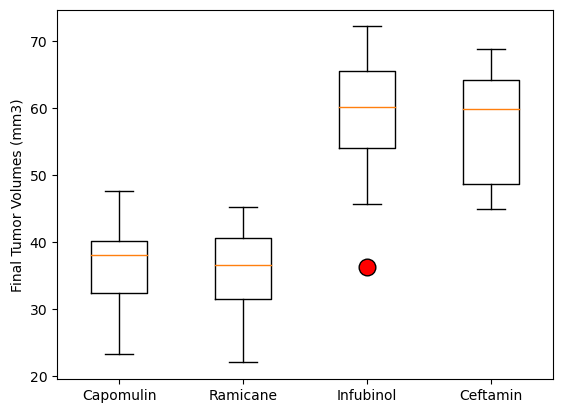

In [49]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Graph boxplots for above data
fig, ax = plt.subplots()
pos = np.arange(len(tumor_data)) + 1
bp = ax.boxplot(tumor_data, positions=pos, labels=treatments)

# Format and label graph
plt.setp(bp['fliers'], markerfacecolor='red', markersize=12)
plt.ylabel('Final Tumor Volumes (mm3)')
plt.show()


## Line and Scatter Plots

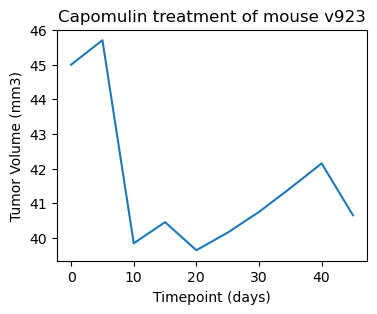

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Get all mice treated with Capomulin
cap_mice = data.loc[data['Drug Regimen'] == 'Capomulin', :]
sample = cap_mice['Mouse ID'].unique()

# Pick a random mouse from the above list
mouse = np.random.choice(sample)
amouse = data.loc[data['Mouse ID'] == mouse, :]

# Plot results for tumor volume vs time points for random mouse
plt.figure(figsize=(4, 3))
plt.plot(amouse['Timepoint'], amouse['Tumor Volume (mm3)'])

# Add labels to graph
plt.title(amouse.iloc[0, 4] + ' treatment of mouse ' + amouse.iloc[0, 0])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


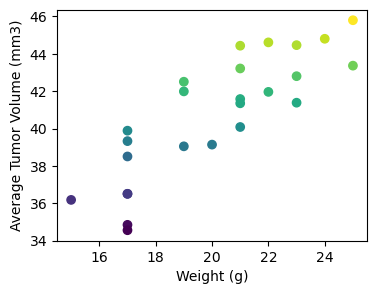

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create dataframe grouped by mouse with tumor volume averages
grp = cap_mice.groupby('Mouse ID')
cap = grp.mean()

# Graph scatterplot of weight vs ave. tumor volume
plt.figure(figsize=(4, 3))
plt.scatter(cap['Weight (g)'], cap['Tumor Volume (mm3)'], c=cap['Tumor Volume (mm3)'])

# Add labels to graph
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


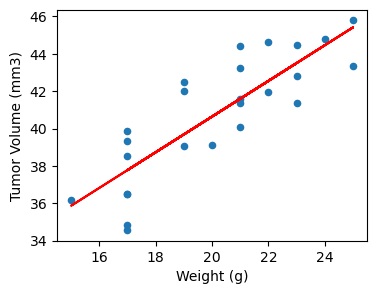

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Redo above graph using Pandas
cap.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', figsize=(4, 3))

# Calculate linear regression info
slope, intercept, rvalue, pvalue, stderr = st.linregress(cap['Weight (g)'], cap['Tumor Volume (mm3)'])
regress = cap['Weight (g)'] * slope + intercept

# Plot regression line
regress_line, = plt.plot(cap['Weight (g)'], regress, color='red')

# Calculate and display correlation info
correlation = st.pearsonr(cap['Weight (g)'], cap['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")
